In [1]:
!tar xvzf /content/sm_norm_mt.tar.gz

release/
release/en2cn-2k.en2nen2cn
release/README


In [2]:
!wget https://www.dropbox.com/s/ddkmtqz01jc024u/glove.6B.100d.txt

--2022-02-10 04:39:06--  https://www.dropbox.com/s/ddkmtqz01jc024u/glove.6B.100d.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/ddkmtqz01jc024u/glove.6B.100d.txt [following]
--2022-02-10 04:39:06--  https://www.dropbox.com/s/raw/ddkmtqz01jc024u/glove.6B.100d.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc51f51af8054a75317b608e1d22.dl.dropboxusercontent.com/cd/0/inline/BfYFrp2UrTwwfeedQkSlVRTIcNRMrk_l-s9nWF4MIeUSkb7SFR62vpheeRCLKrG_-2Gbs2uBxk4rfR4pQYNOPITpXr1BwpEbEM6cwRsAjV7m0dM9ks8CPQsVHqrxc3UwBxZz_Q4G0jfTnDUAIm1nLLff/file# [following]
--2022-02-10 04:39:07--  https://uc51f51af8054a75317b608e1d22.dl.dropboxusercontent.com/cd/0/inline/BfYFrp2UrTwwfeedQkSlVRTIcNRMrk_l-s9nWF4MIeUSkb7SFR62vpheeRCLKrG_-2Gbs2uBxk4

In [ ]:
!wget https://www.dropbox.com/s/ddkmtqz01jc024u/glove.6B.300d.txt

In [1]:
import collections
from collections import Counter

import helper
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline



import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split

from tabulate import tabulate

import gc
import matplotlib.pyplot as plt
%matplotlib inline
# import seaborn as sns
import pandas as pd
import re
import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# import seaborn as sns
import pandas as pd
import re
import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

In [2]:
with open("/content/release/en2cn-2k.en2nen2cn") as f:
  x = f.readlines()

In [3]:
x.insert(0,0)

In [4]:
needed = []
for i in range(len(x)):
  if i%3 !=0:
    needed.append(x[i])

In [5]:
needed

['U wan me to "chop" seat 4 u nt?\n',
 'Do you want me to reserve seat for you or not?\n',
 'Yup. U reaching. We order some durian pastry already. U come quick.\n',
 'Yeap. You reaching? We ordered some Durian pastry already. You come quick.\n',
 'They become more ex oredi... Mine is like 25... So horrible n they did less things than last time...\n',
 'They become more expensive already. Mine is like 25. So horrible and they did less things than I did last time.\n',
 "I'm thai. what do u do?\n",
 "I'm Thai. What do you do?\n",
 'Hi! How did your week go? Haven heard from you for some time... Hows everything?\n',
 "Hi! How did your week go? Haven't heard from you for some time. How's everything?\n",
 'Haha... Okay... You going to mail her? Or you want me to reply...\n',
 'Haha. Okay. Are you going to mail her? Or do you want me to reply?\n',
 'Look for it on glass table in front of tv\n',
 'Look for it on the glass table in front of TV.\n',
 'Nah im goin 2 the wrks with j wot bout u?\n'

In [6]:
corrupt = []
uncorrupt = []
for i in range(len(needed)):
  if i%2 ==0:
    corrupt.append(needed[i][:-1])
  else:
    uncorrupt.append(needed[i][:-1])

In [7]:
#Simple data filing

In [8]:
import pandas as pd

In [9]:
df = pd.DataFrame()

In [10]:
df['corrupt'] = corrupt
df['uncorrupt'] = uncorrupt

In [11]:
df

,corrupt,uncorrupt
0,"U wan me to ""chop"" seat 4 u nt?",Do you want me to reserve seat for you or not?
1,Yup. U reaching. We order some durian pastry a...,Yeap. You reaching? We ordered some Durian pas...
2,They become more ex oredi... Mine is like 25.....,They become more expensive already. Mine is li...
3,I'm thai. what do u do?,I'm Thai. What do you do?
4,Hi! How did your week go? Haven heard from you...,Hi! How did your week go? Haven't heard from y...
...,...,...
1995,Hmmm... Thk i usually book on wkends... Depend...,Hmm. I think I usually book on weekends. It de...
1996,ask them got any sms messages to gif me lei......,Can you ask them whether they have for any sms...
1997,We r near coca oredi...,We are near Coca already.
1998,hall Eleven. Got lectures le mah.èn forget abt...,Hall eleven. Got lectures. And forget about co...


In [12]:
print("Total Sentences: ", df.shape[0])

Total Sentences:  2000


In [13]:
df.isna().sum()

corrupt      0
uncorrupt    0
dtype: int64

In [14]:
#No values

In [15]:
def word_count (txt):
    return len(txt.split())

In [16]:
corr_ = df['corrupt'].apply(lambda x: word_count(x))
print(corr_)
print(max(corr_))


0        9
1       12
2       19
3        6
4       15
        ..
1995     9
1996    40
1997     5
1998    18
1999    16
Name: corrupt, Length: 2000, dtype: int64
49


In [17]:
uncorr_ = df['uncorrupt'].apply(lambda x: word_count(x))
print(uncorr_)
print(max(uncorr_))


0       11
1       12
2       21
3        6
4       15
        ..
1995    10
1996    59
1997     5
1998    16
1999    16
Name: uncorrupt, Length: 2000, dtype: int64
59


In [18]:
#https://kaggle.com/kkhandekar/machine-translation-beginner-s-guide
fig = make_subplots(rows=1, cols=2, subplot_titles=("Corrupted","Uncorrupted"))

fig.add_trace(
    go.Histogram(x=corr_,histfunc='sum',opacity =0.8,showlegend=False,text='Corr'), row=1,col=1)

fig.add_trace(
    go.Histogram(x=uncorr_,histfunc='sum', opacity =0.8,showlegend=False,text='Uncorr'), row=1,col=2)

fig.update_layout(height=600, width=800, title_text="Words Distribution")
fig.show()

In [19]:
#The histogram shows that sentence length lies between 0 to 49,and generally between 0 to 40 for both the corrupt and the uncorrupt

In [20]:
#calculating the percentile values

In [21]:
temp = [i for i in range(9,100,10)]

In [22]:
for i in temp:
  print(np.percentile(corr_,i))

4.0
6.0
8.0
9.0
11.0
13.0
16.0
19.0
25.0
34.0


In [23]:
#Here it is said that 99 percents of the sentences are less the 34.0

In [24]:
for i in temp:
  print(np.percentile(uncorr_,i))

5.0
6.0
8.0
10.0
12.0
14.0
17.0
21.0
27.0
38.0


In [25]:
#Here it is said that 99 percents of the sentences are less the 34.0
#so basically we can take the sentence len as 34

In [26]:
#characted level analysis

In [27]:
def word_countX(txt):
  a = []
  a[:] = txt
  return len(a)

In [28]:
corr_char = df['corrupt'].apply(lambda x: word_countX(x))
print(corr_char)
print(max(corr_char))

0        31
1        67
2       100
3        23
4        80
       ... 
1995     53
1996    202
1997     23
1998     97
1999     69
Name: corrupt, Length: 2000, dtype: int64
221


In [29]:
uncorr_char = df['uncorrupt'].apply(lambda x: word_countX(x))
print(uncorr_char)
print(max(uncorr_char))

0        46
1        74
2       111
3        25
4        81
       ... 
1995     52
1996    281
1997     25
1998     94
1999     73
Name: uncorrupt, Length: 2000, dtype: int64
281


In [30]:
#https://kaggle.com/kkhandekar/machine-translation-beginner-s-guide
fig = make_subplots(rows=1, cols=2, subplot_titles=("Corrupted","Uncorrupted"))

fig.add_trace(
    go.Histogram(x=corr_char,histfunc='sum',opacity =0.8,showlegend=False,text='Corr'), row=1,col=1)

fig.add_trace(
    go.Histogram(x=uncorr_char,histfunc='sum', opacity =0.8,showlegend=False,text='Uncorr'), row=1,col=2)

fig.update_layout(height=600, width=800, title_text="Words Distribution")
fig.show()

In [31]:
#The histogram shows that char length of the sentence  lies between 0 to 150,and for uncorrupt generally between 0 to 200

In [32]:
#since the values are very less,we can redo it.

In [35]:
!pip install nlpaug

     |████████████████████████████████| 410 kB 5.1 MB/s 


In [33]:
text = df.iloc[0][0]

Preprocessing and Model Building

In [34]:
import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.sentence as nas

In [35]:
text = 'The quick brown fox jumps over the lazy dog .'
print(text)

The quick brown fox jumps over the lazy dog .


In [36]:
#run before hnd if necessary
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [37]:
#run before hnd if necessary
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [38]:
aug = naw.SynonymAug(aug_src='wordnet')
augmented_text = aug.augment(text)
print("Original:")
print(text)
print("Augmented Text:")
print(augmented_text)

Original:
The quick brown fox jumps over the lazy dog .
Augmented Text:
The flying brown george fox jumps over the lazy wienerwurst.


In [41]:
aug_1 =  naw.SynonymAug(aug_src='wordnet')
aug_text1 = aug_1.augment(df.iloc[0][0],n = 4)
aug_text1

['U wan me to " chop shot " seat quaternity u nt?',
 'U wan pine tree state to " chopper " seat quaternity u nt?',
 'Uracil wan me to " chop shot " tail end 4 u nt?',
 'U wan maine to " chopper " seat quaternion u national trust?']

In [42]:
new_ucdata = []
new_cdata = []
for i in range(len(df)):
  aug_1 =  naw.SynonymAug(aug_src='wordnet')
  aug_text1 = aug_1.augment(df.iloc[i][0],n = 4)
  new_cdata.extend(aug_text1)
  new_ucdata.append(df.iloc[i][1])
  new_ucdata.append(df.iloc[i][1])
  new_ucdata.append(df.iloc[i][1])
  new_ucdata.append(df.iloc[i][1])





In [43]:
len(new_ucdata)

8000

In [44]:
len(new_cdata)

8000

In [45]:
df2 = pd.DataFrame()

In [46]:
df2['corrupt'] = new_cdata

In [47]:
df2['uncorrupt'] = new_ucdata

In [48]:

df = pd.concat([df, df2], axis = 0)

In [49]:
df

,corrupt,uncorrupt
0,"U wan me to ""chop"" seat 4 u nt?",Do you want me to reserve seat for you or not?
1,Yup. U reaching. We order some durian pastry a...,Yeap. You reaching? We ordered some Durian pas...
2,They become more ex oredi... Mine is like 25.....,They become more expensive already. Mine is li...
3,I'm thai. what do u do?,I'm Thai. What do you do?
4,Hi! How did your week go? Haven heard from you...,Hi! How did your week go? Haven't heard from y...
...,...,...
7995,entrance hall Xi. Got lectures le mah. èn forg...,Hall eleven. Got lectures. And forget about co...
7996,I Bring for u. Unity can not prognosticate u 1...,I bring for you. I can not promise you 100% to...
7997,Ace Lend for u. I toilet not promise u 100% to...,I bring for you. I can not promise you 100% to...
7998,Ane Bring for u. I can not predict u 100% to w...,I bring for you. I can not promise you 100% to...


In [50]:
def decontractions(phrase):
    """decontracted takes text and convert contractions into natural form.
     ref: https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python/47091490#47091490"""
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"won\’t", "will not", phrase)
    phrase = re.sub(r"can\’t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)

    phrase = re.sub(r"n\’t", " not", phrase)
    phrase = re.sub(r"\’re", " are", phrase)
    phrase = re.sub(r"\’s", " is", phrase)
    phrase = re.sub(r"\’d", " would", phrase)
    phrase = re.sub(r"\’ll", " will", phrase)
    phrase = re.sub(r"\’t", " not", phrase)
    phrase = re.sub(r"\’ve", " have", phrase)
    phrase = re.sub(r"\’m", " am", phrase)

    return phrase

def preprocess(text):
    # convert all the text into lower letters
    # use this function to remove the contractions: https://gist.github.com/anandborad/d410a49a493b56dace4f814ab5325bbd
    # remove all the spacial characters: except space ' '
    text = text.lower()
    text = decontractions(text)
    text = re.sub('[$)\?"’.°!;\'€%:,(/]', '', text)
    return text

def preprocess_c(text):
    # convert all the text into lower letters
    # remove the words betweent brakets ()
    # remove these characters: {'$', ')', '?', '"', '’', '.',  '°', '!', ';', '/', "'", '€', '%', ':', ',', '('}
    # replace these spl characters with space: '\u200b', '\xa0', '-', '/'
    # we have found these characters after observing the data points, feel free to explore more and see if you can do find more
    # you are free to do more proprocessing
    # note that the model will learn better with better preprocessed data 
    
    text = text.lower()
    text = decontractions(text)
    text = re.sub('[$)\?"’.°!;\'€%:,(/]', '', text)
    text = re.sub('\u200b', ' ', text)
    text = re.sub('\xa0', ' ', text)
    text = re.sub('-', ' ', text)
    return text



In [51]:
df['uncorrupt'] = df['uncorrupt'].apply(preprocess)
df['corrupt'] = df['corrupt'].apply(preprocess_c)

In [52]:
df

,corrupt,uncorrupt
0,u wan me to chop seat 4 u nt,do you want me to reserve seat for you or not
1,yup u reaching we order some durian pastry alr...,yeap you reaching we ordered some durian pastr...
2,they become more ex oredi mine is like 25 so h...,they become more expensive already mine is lik...
3,i am thai what do u do,i am thai what do you do
4,hi how did your week go haven heard from you f...,hi how did your week go have not heard from yo...
...,...,...
7995,entrance hall xi got lectures le mah èn forget...,hall eleven got lectures and forget about comp...
7996,i bring for u unity can not prognosticate u 10...,i bring for you i can not promise you 100 to w...
7997,ace lend for u i toilet not promise u 100 to w...,i bring for you i can not promise you 100 to w...
7998,ane bring for u i can not predict u 100 to win...,i bring for you i can not promise you 100 to w...


In [53]:
c_l = df['corrupt'].str.split().apply(len)
uc_l = df['uncorrupt'].str.split().apply(len)

In [54]:
for i in range(0,101,10):
    print(i,np.percentile(c_l, i))
for i in range(90,101):
    print(i,np.percentile(c_l, i))
for i in [99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100]:
    print(i,np.percentile(c_l, i))

0 1.0
10 5.0
20 7.0
30 9.0
40 11.0
50 13.0
60 15.0
70 18.0
80 22.0
90 28.0
100 53.0
90 28.0
91 29.0
92 29.0
93 30.0
94 31.0
95 32.0
96 33.0
97 35.0
98 36.0
99 38.0
100 53.0
99.1 39.0
99.2 39.0
99.3 39.0
99.4 39.0
99.5 40.0
99.6 40.0
99.7 41.0
99.8 41.00200000000041
99.9 44.0
100 53.0


In [55]:
for i in range(0,101,10):
    print(i,np.percentile(uc_l, i))
for i in range(90,101):
    print(i,np.percentile(uc_l, i))
for i in [99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100]:
    print(i,np.percentile(uc_l, i))

0 1.0
10 5.0
20 7.0
30 9.0
40 10.0
50 12.0
60 15.0
70 18.0
80 22.0
90 28.0
100 61.0
90 28.0
91 29.0
92 30.0
93 31.0
94 32.0
95 33.0
96 34.0
97 35.0
98 36.0
99 39.0
100 61.0
99.1 39.0
99.2 39.0
99.3 40.0
99.4 40.00600000000122
99.5 41.0
99.6 42.004000000000815
99.7 44.00900000000183
99.8 48.00200000000041
99.9 50.001000000000204
100 61.0


In [56]:
df['c_l'] = df['corrupt'].str.split().apply(len)
df = df[df['c_l'] < 40]

df['uc_l'] = df['uncorrupt'].str.split().apply(len)
df = df[df['uc_l'] < 40]

df['uc_inp'] = '<start> ' + df['uncorrupt'].astype(str)
df['uc_out'] = df['uncorrupt'].astype(str) + ' <end>'


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [57]:
df

,corrupt,uncorrupt,c_l,uc_l,uc_inp,uc_out
0,u wan me to chop seat 4 u nt,do you want me to reserve seat for you or not,9,11,<start> do you want me to reserve seat for you...,do you want me to reserve seat for you or not ...
1,yup u reaching we order some durian pastry alr...,yeap you reaching we ordered some durian pastr...,12,12,<start> yeap you reaching we ordered some duri...,yeap you reaching we ordered some durian pastr...
2,they become more ex oredi mine is like 25 so h...,they become more expensive already mine is lik...,19,21,<start> they become more expensive already min...,they become more expensive already mine is lik...
3,i am thai what do u do,i am thai what do you do,7,7,<start> i am thai what do you do,i am thai what do you do <end>
4,hi how did your week go haven heard from you f...,hi how did your week go have not heard from yo...,15,17,<start> hi how did your week go have not heard...,hi how did your week go have not heard from yo...
...,...,...,...,...,...,...
7995,entrance hall xi got lectures le mah èn forget...,hall eleven got lectures and forget about comp...,22,16,<start> hall eleven got lectures and forget ab...,hall eleven got lectures and forget about comp...
7996,i bring for u unity can not prognosticate u 10...,i bring for you i can not promise you 100 to w...,18,16,<start> i bring for you i can not promise you ...,i bring for you i can not promise you 100 to w...
7997,ace lend for u i toilet not promise u 100 to w...,i bring for you i can not promise you 100 to w...,17,16,<start> i bring for you i can not promise you ...,i bring for you i can not promise you 100 to w...
7998,ane bring for u i can not predict u 100 to win...,i bring for you i can not promise you 100 to w...,16,16,<start> i bring for you i can not promise you ...,i bring for you i can not promise you 100 to w...


In [58]:
df = df.drop(['uncorrupt','c_l','uc_l'],axis = 1)

In [59]:
df

,corrupt,uc_inp,uc_out
0,u wan me to chop seat 4 u nt,<start> do you want me to reserve seat for you...,do you want me to reserve seat for you or not ...
1,yup u reaching we order some durian pastry alr...,<start> yeap you reaching we ordered some duri...,yeap you reaching we ordered some durian pastr...
2,they become more ex oredi mine is like 25 so h...,<start> they become more expensive already min...,they become more expensive already mine is lik...
3,i am thai what do u do,<start> i am thai what do you do,i am thai what do you do <end>
4,hi how did your week go haven heard from you f...,<start> hi how did your week go have not heard...,hi how did your week go have not heard from yo...
...,...,...,...
7995,entrance hall xi got lectures le mah èn forget...,<start> hall eleven got lectures and forget ab...,hall eleven got lectures and forget about comp...
7996,i bring for u unity can not prognosticate u 10...,<start> i bring for you i can not promise you ...,i bring for you i can not promise you 100 to w...
7997,ace lend for u i toilet not promise u 100 to w...,<start> i bring for you i can not promise you ...,i bring for you i can not promise you 100 to w...
7998,ane bring for u i can not predict u 100 to win...,<start> i bring for you i can not promise you ...,i bring for you i can not promise you 100 to w...


In [60]:
from sklearn.model_selection import train_test_split
train, validation = train_test_split(df, test_size=0.2)
print(train.shape, validation.shape)
# for one sentence we will be adding <end> token so that the tokanizer learns the word <end>
# with this we can use only one tokenizer for both encoder output and decoder output
train.iloc[0]['uc_inp']= str(train.iloc[0]['uc_inp'])+' <end>'
train.iloc[0]['uc_out']= str(train.iloc[0]['uc_out'])+' <end>'

(7919, 3) (1980, 3)


In [61]:
train.head()

,corrupt,uc_inp,uc_out
3766,hullo everybody nice to meet ü all anyway my...,<start> hello everyone nice to meet you all an...,hello everyone nice to meet you all anyway my ...
1216,cheers for callin baby soz i culdnt talk but i...,<start> cheers for call in babe so that i coul...,cheers for call in babe so that i could not ta...
1804,joey how do you do r uranium guy beaver state ...,<start> joey hello are you a boy or a girl i a...,joey hello are you a boy or a girl i am a girl...
3699,i m still at comp substance leh on that poin...,<start> i am still at computer centre there is...,i am still at computer centre there is still a...
6998,okay they arent open on public holiday,<start> okay they are not open on public holidays,okay they are not open on public holidays <end>


In [62]:
validation.head()

,corrupt,uc_inp,uc_out
7223,buckeye state lk tt ah wat kind of jobs u wi...,<start> oh like that what kind of jobs you wan...,oh like that what kind of jobs you want waitre...
6023,that s non true how can tv follow more import...,<start> that is not true how can tv be more im...,that is not true how can tv be more important ...
1725,hmmm after my drivin den gratuitous lor ato...,<start> after my driving then i will be free why,after my driving then i will be free why <end>
1158,hiya great to hear from ya actually just gotte...,<start> hi it is great to hear from you actual...,hi it is great to hear from you actually i jus...
5934,haha cause supervisor go oversea lo then no a...,<start> haha because supervisor went overseas ...,haha because supervisor went overseas then no ...


In [63]:
tknizer_c = Tokenizer()
tknizer_c.fit_on_texts(train['corrupt'].values)
tknizer_uc = Tokenizer(filters='!"#$%&()*+,-./:;=?@[\\]^_`{|}~\t\n')
tknizer_uc.fit_on_texts(train['uc_inp'].values)

In [64]:
tknizer_uc.index_word

{1: '<start>',
 2: 'you',
 3: 'i',
 4: 'to',
 5: 'is',
 6: 'not',
 7: 'the',
 8: 'are',
 9: 'am',
 10: 'do',
 11: 'it',
 12: 'for',
 13: 'me',
 14: 'at',
 15: 'and',
 16: 'can',
 17: 'have',
 18: 'a',
 19: 'my',
 20: 'so',
 21: 'will',
 22: 'then',
 23: 'your',
 24: 'go',
 25: 'what',
 26: 'ok',
 27: 'want',
 28: 'haha',
 29: 'in',
 30: 'hey',
 31: 'that',
 32: 'going',
 33: 'how',
 34: 'of',
 35: 'or',
 36: 'on',
 37: 'be',
 38: 'now',
 39: 'but',
 40: 'just',
 41: 'we',
 42: 'got',
 43: 'with',
 44: 'time',
 45: 'see',
 46: 'know',
 47: 'no',
 48: 'already',
 49: 'tomorrow',
 50: 'think',
 51: 'if',
 52: 'hi',
 53: 'yes',
 54: 'meet',
 55: 'there',
 56: 'all',
 57: 'did',
 58: 'good',
 59: 'still',
 60: 'up',
 61: 'out',
 62: 'come',
 63: 'okay',
 64: 'call',
 65: 'where',
 66: 'one',
 67: 'because',
 68: 'get',
 69: 'when',
 70: 'also',
 71: 'like',
 72: 'this',
 73: 'too',
 74: 'from',
 75: 'she',
 76: 'home',
 77: 'need',
 78: 'oh',
 79: 'about',
 80: 'why',
 81: 'back',
 82: 'ver

In [65]:
vocab_size_uc=len(tknizer_uc.word_index.keys())
print(vocab_size_uc)
vocab_size_c=len(tknizer_c.word_index.keys())
print(vocab_size_c)

3010
7416


In [66]:
tknizer_uc.word_index['<start>'], tknizer_uc.word_index['<end>']

(1, 2997)

In [67]:
embeddings_index = dict()
f = open('glove.6B.100d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

embedding_matrix = np.zeros((vocab_size_uc+1, 100))
for word, i in tknizer_uc.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

#every word from tokenizer will become a 100 dim vector

In [68]:
 class Encoder(tf.keras.Model):
    '''
    Encoder model -- That takes a input sequence and returns encoder-outputs,encoder_final_state_h,encoder_final_state_c
    '''
    
    def __init__(self,inp_vocab_size,embedding_size,lstm_size,input_length):
      super().__init__()
      self.inp_vocab_size= inp_vocab_size
      self.embedding_size = embedding_size
      self.input_length = input_length
      self.lstm_size = lstm_size
      self.lstm_output = 0
      self.lstm_state_h = 0
      self.lstm_state_c = 0
      self.embedding = Embedding(input_dim=self.inp_vocab_size, output_dim=self.embedding_size, input_length=self.input_length,
                           mask_zero=True, name="embedding_layer_encoder")
      self.lstm = LSTM(self.lstm_size, return_state=True, return_sequences=True, name="Encoder_LSTM")

        #Initialize Embedding layer
        #Intialize Encoder LSTM layer


    def call(self,input_sequence,states):
        '''
          This function takes a sequence input and the initial states of the encoder.
          Pass the input_sequence input to the Embedding layer, Pass the embedding layer ouput to encoder_lstm
          returns -- encoder_output, last time step's hidden and cell state
        '''
        input_embedd= self.embedding(input_sequence)
        self.lstm_output, self.lstm_state_h,self.lstm_state_c = self.lstm(input_embedd)
        return self.lstm_output, self.lstm_state_h,self.lstm_state_c
    
    def initialize_states(self,batch_size):
          '''
          Given a batch size it will return intial hidden state and intial cell state.

          If batch size is 32- Hidden state is zeros of size [32,lstm_units], cell state zeros is of size [32,lstm_units]
          '''
          initial_hidden_state =tf.zeros(shape=[batch_size,self.lstm_size],dtype=tf.int32)
          initial_cell_state =tf.zeros(shape=[batch_size,self.lstm_size],dtype=tf.int32)
          return initial_hidden_state,initial_cell_state



In [69]:
class Decoder(tf.keras.Model):
    '''
    Encoder model -- That takes a input sequence and returns output sequence
    '''

    def __init__(self,out_vocab_size,embedding_size,lstm_size,input_length):
      super().__init__()
      self.out_vocab_size = out_vocab_size
      self.embedding_size = embedding_size
      self.lstm_size = lstm_size
      self.input_length = input_length
      #self.initial_states = initial_states

    def build(self,input_shape):

      self.embedding = Embedding(input_dim = self.out_vocab_size,output_dim = self.embedding_size,input_length = self.input_length,
                                 mask_zero = True, name="embedding_layer_decoder",trainable=False)
      self.lstm = LSTM(self.lstm_size,return_sequences= True,return_state = True,name = "Decoder_LSTM")
      
    def call(self,input_sequence,initial_states):
        '''
          This function takes a sequence input and the initial states of the encoder.
          Pass the input_sequence input to the Embedding layer, Pass the embedding layer ouput to decoder_lstm
        
          returns -- decoder_output,decoder_final_state_h,decoder_final_state_c
        '''
        target_embedd = self.embedding(input_sequence)
        lstm_output,lstm_final_state_h,lstm_final_state_c = self.lstm(target_embedd,initial_states)
        return lstm_output,lstm_final_state_h,lstm_final_state_c


In [70]:
class Encoder_decoder(tf.keras.Model):
  def __init__(self,encoder_inputs_length,decoder_inputs_length,output_vocab_size,batch_size):
      #Create encoder object
      super().__init__()
      self.encoder = Encoder(inp_vocab_size = vocab_size_c+1,embedding_size = 100,lstm_size = 256,input_length = encoder_inputs_length)
      self.decoder = Decoder(out_vocab_size = vocab_size_uc+1,embedding_size = 100,lstm_size = 256,input_length = decoder_inputs_length )
      self.dense   = Dense(output_vocab_size, activation='softmax')
      self.batch_size = batch_size
    
  def call(self,data):
        '''
        A. Pass the input sequence to Encoder layer -- Return encoder_output,encoder_final_state_h,encoder_final_state_c
        B. Pass the target sequence to Decoder layer with intial states as encoder_final_state_h,encoder_final_state_C
        C. Pass the decoder_outputs into Dense layer 
        
        Return decoder_outputs
        '''
        input,output = data[0],data[1]
        initial_state = self.encoder.initialize_states(self.batch_size)
        encoder_output,encoder_h,encoder_c = self.encoder(input,initial_state)
        states = [encoder_h,encoder_c]
        decoder_output,_,_ = self.decoder(output,states)
        output= self.dense(decoder_output)
        return output

In [78]:
class Dataset:
    def __init__(self, data, tknizer_ita, tknizer_eng, max_len):
        self.encoder_inps = data['corrupt'].values
        self.decoder_inps = data['uc_inp'].values
        self.decoder_outs = data['uc_out'].values
        self.tknizer_eng = tknizer_uc
        self.tknizer_ita = tknizer_c
        self.max_len = max_len

    def __getitem__(self, i):
        self.encoder_seq = self.tknizer_ita.texts_to_sequences([self.encoder_inps[i]]) # need to pass list of values
        self.decoder_inp_seq = self.tknizer_eng.texts_to_sequences([self.decoder_inps[i]])
        self.decoder_out_seq = self.tknizer_eng.texts_to_sequences([self.decoder_outs[i]])

        self.encoder_seq = pad_sequences(self.encoder_seq, maxlen=self.max_len, dtype='int32', padding='post')
        self.decoder_inp_seq = pad_sequences(self.decoder_inp_seq, maxlen=self.max_len, dtype='int32', padding='post')
        self.decoder_out_seq = pad_sequences(self.decoder_out_seq, maxlen=self.max_len, dtype='int32', padding='post')
        return self.encoder_seq, self.decoder_inp_seq, self.decoder_out_seq

    def __len__(self): # your model.fit_gen requires this function
        return len(self.encoder_inps)

    
class Dataloder(tf.keras.utils.Sequence):    
    def __init__(self, dataset, batch_size=1):
        self.dataset = dataset
        self.batch_size = batch_size
        self.indexes = np.arange(len(self.dataset.encoder_inps))


    def __getitem__(self, i):
        start = i * self.batch_size
        stop = (i + 1) * self.batch_size
        data = []
        for j in range(start, stop):
            data.append(self.dataset[j])

        batch = [np.squeeze(np.stack(samples, axis=1), axis=0) for samples in zip(*data)]
        # we are creating data like ([italian, english_inp], english_out) these are already converted into seq
        return tuple([[batch[0],batch[1]],batch[2]])

    def __len__(self):  # your model.fit_gen requires this function
        return len(self.indexes) // self.batch_size

    def on_epoch_end(self):
        self.indexes = np.random.permutation(self.indexes)


In [72]:
train

,corrupt,uc_inp,uc_out
1457,daddy at home what time you will be back to fe...,<start> daddy is at home what time will you be...,daddy is at home what time will you be back to...
3695,eh sorrie mi didnt noe uracil called we r not...,<start> sorry i did not know you called we are...,sorry i did not know you called we are not hav...
1674,im watchin smallville dozin polish off dun t...,<start> i am watching smallville i am dozing o...,i am watching smallville i am dozing off i do ...
2272,no nd liao dynasty,<start> no need,no need <end>
3466,if u be in town 1 get hold of taxi myself,<start> if you are in town i take taxi myself,if you are in town i take taxi myself <end>
...,...,...,...
1849,i juz came back frm aust yest lor cant take e ...,<start> i just came back from australia yester...,i just came back from australia yesterday can ...
1640,iodine rag mind kaiez set up liao haiz u muz...,<start> i do not mind set sigh you must be sla...,i do not mind set sigh you must be slacking no...
2475,sorry hehe wun embody going iv lect todae & t...,<start> sorry i will not be going for lecture ...,sorry i will not be going for lecture today an...
1013,thanx 4 the time we ve spent 2geva its bin mi...,<start> thanks for the time we have spent toge...,thanks for the time we have spent together it ...


In [73]:
train_dataset = Dataset(train, tknizer_c, tknizer_uc, 40)
test_dataset  = Dataset(validation, tknizer_c, tknizer_uc, 40)

train_dataloader = Dataloder(train_dataset, batch_size=200)
test_dataloader = Dataloder(test_dataset, batch_size=200)


print(train_dataloader[0][0][0].shape, train_dataloader[0][0][1].shape, train_dataloader[0][1].shape)

(200, 40) (200, 40) (200, 40)


In [74]:
#Create an object of encoder_decoder Model class, 
# Compile the model and fit the model
model  = Encoder_decoder(encoder_inputs_length=40,decoder_inputs_length=40,output_vocab_size=vocab_size_uc,batch_size = 1)
optimizer = tf.keras.optimizers.Adam()
model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy')
train_steps=train.shape[0]//200
valid_steps=validation.shape[0]//200
history = model.fit(train_dataloader, steps_per_epoch=train_steps, epochs=100, validation_data=train_dataloader, validation_steps=valid_steps)
model.summary()

Epoch 1/100
23/23 [==============================] - 14s 198ms/step - loss: 2.7845 - val_loss: 2.3954
Epoch 2/100
23/23 [==============================] - 1s 54ms/step - loss: 2.2741 - val_loss: 2.3063
Epoch 3/100
23/23 [==============================] - 1s 55ms/step - loss: 2.2100 - val_loss: 2.2667
Epoch 4/100
23/23 [==============================] - 1s 54ms/step - loss: 2.1822 - val_loss: 2.2538
Epoch 5/100
23/23 [==============================] - 1s 54ms/step - loss: 2.1702 - val_loss: 2.2460
Epoch 6/100
23/23 [==============================] - 1s 53ms/step - loss: 2.1643 - val_loss: 2.2351
Epoch 7/100
23/23 [==============================] - 1s 56ms/step - loss: 2.1561 - val_loss: 2.2276
Epoch 8/100
23/23 [==============================] - 1s 55ms/step - loss: 2.1454 - val_loss: 2.2154
Epoch 9/100
23/23 [==============================] - 1s 53ms/step - loss: 2.1361 - val_loss: 2.2060
Epoch 10/100
23/23 [==============================] - 1s 54ms/step - loss: 2.1275 - val_loss: 2.20

In [90]:
def get_key(val):
    for key, value in tknizer_uc.word_index.items():
         if val == value:
             return key
 
    return "key doesn't exist"

In [76]:
def predict(input_sentence):
  input_sequences = tknizer_c.texts_to_sequences([input_sentence])
  encoder_sequence = pad_sequences(input_sequences, maxlen = 20, dtype='int32', padding='post')
  #print(encoder_sequence)
  #encoder = Encoder(vocab_size_ita+1,100,256,20)
  #initial_state=encoder.initialize_states(1)
  encoder_output,state_h,state_c= model.layers[0](encoder_sequence,model.layers[0].initialize_states(1))
  dec_input = tknizer_uc.word_index['<start>']
  dec_input = (np.array(dec_input)).reshape(1,1)
  #print(dec_input)
  states = [state_h,state_c]
  j = 0
  final = []
  while j!=20:
    predicted_out,state_h,state_c=model.layers[1](dec_input,states)
    output = model.layers[2](predicted_out)
    states = [state_h,state_c]
    output= np.argmax(output,-1)
    b = get_key(output[0][0])
    if b == '<end>':
      break
    else:
      final.append(get_key(output[0][0]))
      dec_input = output
      j+=1
  return ' '.join(final)

In [77]:
for i in range(10):
  print(predict(validation.iloc[i][0]))

just got at with i am not know what you go
what is mb
i think i got a bit you there i am go to school because i am to to your some
so what time time you want to go to
that it is it is not you can go to watch a bit i am going to take with you
i am fine at the canteen the name the name and enjoy yourself
hey are you driving to come tomorrow
yes i do not mind what time i am not have a but i will be with to see you
do not know that to do you think i am to buy you tomorrow it is a lot
wow it is it is like a good that is it is raining


In [78]:
for i in range(10):
  print(validation.iloc[i][1])

<start> i am with my brother but later he is going out
<start> what is mb
<start> do not ask it is for a stupid reason anyway i will just focus on being around in mainland you can come out
<start> so where and what time do you want to meet
<start> hey i know it is rude of me not to do something about the phone and i am sorry it died on you
<start> i am shopping at brunswick st alannan hill look for me there when you get a park
<start> hey you are going for eng tomorrow
<start> hm yes i do not mind going but she sounds like she really needs to sell the tickets are you going
<start> do not know i am online i can help you check what is your user id and password
<start> wow cookies so sweet of you i bet your cookies are damn tasty


In [79]:
#getting the bleu scores

In [80]:
final = []
for i in range(len(validation)):
  final.append(predict(validation.iloc[i][0]))

In [81]:
orignal = []
for i in range(len(validation)):
  orignal.append(validation.iloc[i][1])

In [82]:
import nltk
bleu_avg = []

for i in range(len(final)):
  hypothesis = final[i].split()
  reference = orignal[i].split()
  #there may be several references
  BLEUscore = nltk.translate.bleu_score.sentence_bleu([reference], hypothesis)
  bleu_avg.append(BLEUscore)

/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning:


Corpus/Sentence contains 0 counts of 3-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().

/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning:


Corpus/Sentence contains 0 counts of 4-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().

/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning:


Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().



In [83]:
(sum(bleu_avg))/len(bleu_avg)

0.4093055744173989

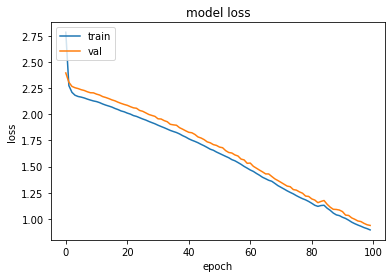

In [84]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [79]:
class Encoder(tf.keras.Model):
    '''
    Encoder model -- That takes a input sequence and returns output sequence
    '''

    def __init__(self,inp_vocab_size,embedding_size,lstm_size,input_length):

      super().__init__()
      self.inp_vocab_size= inp_vocab_size
      self.embedding_size = embedding_size
      self.input_length = input_length
      self.lstm_size = lstm_size
      self.lstm_output = 0
      self.lstm_state_h = 0
      self.lstm_state_c = 0
      self.embedding = Embedding(input_dim=self.inp_vocab_size, output_dim=self.embedding_size, input_length=self.input_length,
                            mask_zero=True, name="embedding_layer_encoder")
      self.lstm = LSTM(self.lstm_size, return_state=True, return_sequences=True, name="Encoder_LSTM")

    def call(self,input_sequence,states):
      input_embedd= self.embedding(input_sequence)
      self.lstm_output, self.lstm_state_h,self.lstm_state_c = self.lstm(input_embedd)
      return self.lstm_output, self.lstm_state_h,self.lstm_state_c


    
    def initialize_states(self,batch_size):
      #check
      '''
      Given a batch size it will return intial hidden state and intial cell state.
      If batch size is 32- Hidden state is zeros of size [32,lstm_units], cell state zeros is of size [32,lstm_units]
      '''
      initial_hidden_state =tf.zeros(shape=[batch_size,self.lstm_size],dtype=tf.int32)
      initial_cell_state =tf.zeros(shape=[batch_size,self.lstm_size],dtype=tf.int32)
      return initial_hidden_state,initial_cell_state

In [80]:
class Attention(tf.keras.layers.Layer):
  '''
    Class the calculates score based on the scoring_function using Bahdanu attention mechanism.
  '''
  def __init__(self,scoring_function, att_units):
    super().__init__()
    self.scoring_function = scoring_function
    self.att_units = att_units

    # Please go through the reference notebook and research paper to complete the scoring functions

    if self.scoring_function=='dot':
      # Intialize variables needed for Dot score function here
      # encoder output
      self.Dot = tf.keras.layers.Dot(axes=(1, 2))
    if scoring_function == 'general':
      self.W1= tf.keras.layers.Dense(att_units)
      self.Dot = tf.keras.layers.Dot(axes=(1, 2))
    elif scoring_function == 'concat':
      # Intialize variables needed for Concat score function here
        self.W2 = tf.keras.layers.Dense(att_units)
        self.W3 = tf.keras.layers.Dense(att_units)
        self.V = tf.keras.layers.Dense(1)
  
  def call(self,decoder_hidden_state,encoder_output):
    '''
      Attention mechanism takes two inputs current step -- decoder_hidden_state and all the encoder_outputs.
      * Based on the scoring function we will find the score or similarity between decoder_hidden_state and encoder_output.
        Multiply the score function with your encoder_outputs to get the context vector.
        Function returns context vector and attention weights(softmax - scores)
    '''
    if self.scoring_function == 'dot':
        # Implement Dot score function here
        decoder_hidden_state = tf.expand_dims(decoder_hidden_state,1)
        dhs = tf.transpose(decoder_hidden_state,(0,2,1))
        #print(dhs.shape)
        #print(encoder_output.shape)
        x = self.Dot([dhs,encoder_output])
        a = tf.nn.softmax(tf.transpose(x,(0,2,1)),axis=1)
        c = a*encoder_output
        c = tf.reduce_sum(c,axis = 1)
        #print(c.shape,a.shape)
        return c,a




  


    elif self.scoring_function == 'general':
        # Implement General score function here
        decoder_hidden_state = tf.expand_dims(decoder_hidden_state,1)
        wa = self.W1(encoder_output)
        dhs = tf.transpose(decoder_hidden_state,(0,2,1))
        x = self.Dot([dhs,wa])
        
        a = tf.nn.softmax(tf.transpose(x,(0,2,1)),axis=1)
        c = a*encoder_output
        c = tf.reduce_sum(c,axis = 1)
        #print(c.shape,a.shape)
        return c,a

    elif self.scoring_function == 'concat':
        # Implement General score function here
        decoder_hidden_state = tf.expand_dims(decoder_hidden_state,1)
        e = self.V(tf.nn.tanh(self.W2(decoder_hidden_state)+self.W3(encoder_output)))
        a = tf.nn.softmax(e,axis = 1)
        c = a*encoder_output
        c = tf.reduce_sum(c,axis = 1)
        m = self.W2
        #print(c.shape,a.shape)
        #print(m.shape)
        return c,a

In [81]:
class One_Step_Decoder(tf.keras.Model):
  def __init__(self,tar_vocab_size, embedding_dim, input_length, dec_units ,score_fun ,att_units):
    super().__init__()
    self.tar_vocab_size = tar_vocab_size 
    self.embedding_dim = embedding_dim
    self.input_length =  input_length
    self.dec_units = dec_units
    self.score_fun = score_fun
    self.att_units = att_units
# Initialize decoder embedding layer, LSTM and any other objects needed
    self.lstm_output = 0
    self.lstm_state_h = 0
    self.lstm_state_c = 0
    self.embedding = Embedding(input_dim=self.tar_vocab_size, output_dim=self.embedding_dim, input_length=self.input_length,
                            mask_zero=True, name="embedding_layer_encoder")
    self.lstm = LSTM(att_units, return_state=True, return_sequences=True, name="Encoder_LSTM")
    self.dense   = Dense(self.tar_vocab_size)
    self.attention = Attention(scoring_function = self.score_fun,att_units = self.att_units)




  def call(self,input_to_decoder, encoder_output, state_h,state_c):
    '''
        One step decoder mechanisim step by step:
      A. Pass the input_to_decoder to the embedding layer and then get the output(batch_size,1,embedding_dim)
      B. Using the encoder_output and decoder hidden state, compute the context vector.
      C. Concat the context vector with the step A output
      D. Pass the Step-C output to LSTM/GRU and get the decoder output and states(hidden and cell state)
      E. Pass the decoder output to dense layer(vocab size) and store the result into output.
      F. Return the states from step D, output from Step E, attention weights from Step -B
    '''
    
    input_embedding= self.embedding(input_to_decoder)
    context,similarities = self.attention(state_h,encoder_output)
    #print(input_embedding.shape)
    #print(context.shape)
    concat = tf.keras.layers.Concatenate(axis = 2)([input_embedding,tf.expand_dims(context,1)])
    decoder_output,*states = self.lstm(concat)
    
    #print(states[0].shape)
    decoder_hidden,decoder_cell = states[0],states[1]

    output =self.dense(decoder_output[:,:,:self.dec_units])
    #print(decoder_hidden.shape)
    return tf.squeeze(output,axis = 1),decoder_hidden,decoder_cell,similarities,context
#context_vector = 32116
#i2d_output = 32112

In [82]:
class Decoder(tf.keras.Model):
    def __init__(self,out_vocab_size, embedding_dim, input_length, dec_units ,score_fun ,att_units):
                
      super().__init__()
      #Intialize necessary variables and create an object from the class onestepdecoder
      self.out_vocab_size = out_vocab_size
      self.embedding_dim = embedding_dim

      self.input_length = input_length
      self.dec_units = dec_units
      self.score_fun = score_fun
      self.att_units = att_units
      self.onestepdecoder=One_Step_Decoder(self.out_vocab_size, self.embedding_dim, self.input_length, self.dec_units ,self.score_fun ,self.att_units)  

        
    def call(self, input_to_decoder,encoder_output,decoder_hidden_state,decoder_cell_state ):

        #Initialize an empty Tensor array, that will store the outputs at each and every time step
        #Create a tensor array as shown in the reference notebook
        
        #Iterate till the length of the decoder input
            # Call onestepdecoder for each token in decoder_input
            # Store the output in tensorarray
        # Return the tensor array
        all_outputs = tf.TensorArray(tf.float32, size=40, name = 'output_arrays',dynamic_size = True,clear_after_read = False)
        for i in range(40):
          output,decoder_hidden_state ,decoder_cell_state,attention_weights,context_vector = self.onestepdecoder(input_to_decoder[:,i:i+1],encoder_output,decoder_hidden_state,decoder_cell_state)#sequence is correct
          all_outputs = all_outputs.write(i,output)

       # all_outputs.mark_used()


        all_outputs = tf.transpose(all_outputs.stack(),[1,0,2])
        return all_outputs

In [98]:
class encoder_decoder(tf.keras.Model):
  def __init__(self,encoder_inputs_length,decoder_inputs_length,output_vocab_size,batch_size):
    #Intialize objects from encoder decoder
    super().__init__()
    self.encoder = Encoder(inp_vocab_size = vocab_size_c+2,embedding_size = 100,lstm_size = 512,input_length = encoder_inputs_length)
    self.decoder = Decoder(out_vocab_size = vocab_size_uc+2,embedding_dim = 100,input_length = decoder_inputs_length ,dec_units = 512,score_fun = 'concat',att_units = 512)
    self.dense   = Dense(output_vocab_size, activation='softmax')
    self.batch_size = batch_size
    self.embedding = Embedding(input_dim=vocab_size_c+1, output_dim=100, input_length=40,
                           mask_zero=True, name="embedding_layer_encoder")

  
  def call(self,data):
    #Intialize encoder states, Pass the encoder_sequence to the embedding layer
    # Decoder initial states are encoder final states, Initialize it accordingly
    # Pass the decoder sequence,encoder_output,decoder states to Decoder
    # return the decoder output
    input,output = data[0],data[1]
    initial_state = self.encoder.initialize_states(self.batch_size)
    input_embedd= input
    encoder_output,encoder_h,encoder_c = self.encoder(input_embedd,initial_state)
    decoder_output = self.decoder(output,encoder_output,encoder_h,encoder_c)
    return decoder_output
   



In [100]:
#https://www.tensorflow.org/tutorials/text/image_captioning#model
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')


def loss_function(real, pred):
    """ Custom loss function that will not consider the loss for padded zeros.
    why are we using this, can't we use simple sparse categorical crossentropy?
    Yes, you can use simple sparse categorical crossentropy as loss like we did in task-1. But in this loss function we are ignoring the loss
    for the padded zeros. i.e when the input is zero then we donot need to worry what the output is. This padded zeros are added from our end
    during preprocessing to make equal length for all the sentences.

    """
    
    
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_mean(loss_)

In [101]:
train_dataset = Dataset(train, tknizer_c, tknizer_uc, 40)
test_dataset  = Dataset(validation, tknizer_c, tknizer_uc, 40)

train_dataloader = Dataloder(train_dataset, batch_size=64)
test_dataloader = Dataloder(test_dataset, batch_size = 64)

In [112]:
model  = encoder_decoder(encoder_inputs_length=40,decoder_inputs_length=40,output_vocab_size=vocab_size_uc,batch_size =1)
optimizer = tf.keras.optimizers.RMSprop()
model.compile(optimizer=optimizer,loss=loss_function)
train_steps=train.shape[0]//64
valid_steps=validation.shape[0]//64
history= model.fit_generator(train_dataloader, steps_per_epoch=train_steps, epochs= 50 , validation_data=test_dataloader, validation_steps=valid_steps)
model.summary()
#change the word embedding introduce 300

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning:

`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.



Epoch 1/50
123/123 [==============================] - 337s 997ms/step - loss: 2.2623 - val_loss: 2.1265
Epoch 2/50
123/123 [==============================] - 51s 411ms/step - loss: 2.0377 - val_loss: 1.9566
Epoch 3/50
123/123 [==============================] - 51s 417ms/step - loss: 1.8888 - val_loss: 1.8443
Epoch 4/50
123/123 [==============================] - 51s 416ms/step - loss: 1.7781 - val_loss: 1.7634
Epoch 5/50
123/123 [==============================] - 51s 417ms/step - loss: 1.6871 - val_loss: 1.6828
Epoch 6/50
123/123 [==============================] - 51s 415ms/step - loss: 1.6045 - val_loss: 1.6123
Epoch 7/50
123/123 [==============================] - 51s 414ms/step - loss: 1.5220 - val_loss: 1.5499
Epoch 8/50
123/123 [==============================] - 51s 417ms/step - loss: 1.4433 - val_loss: 1.4876
Epoch 9/50
123/123 [==============================] - 51s 414ms/step - loss: 1.3640 - val_loss: 1.4297
Epoch 10/50
123/123 [==============================] - 51s 411ms/step - 

In [103]:
def plot_attention(f,i ,attention):
  i = i.split(" ")
  f = f.split() + ['[END]']
  fig = plt.figure(figsize=(10, 10))
  ax = fig.add_subplot(1, 1, 1)
  attention = attention[:len(f),:len(i)]
  ax.matshow(attention, cmap='viridis', vmin=0.0)
  fontdict = {'fontsize': 14}
  ax.set_xticklabels([''] + i, fontdict=fontdict, rotation=90)
  ax.set_yticklabels([''] + f, fontdict=fontdict)



  ax.set_xlabel('Input text')
  ax.set_ylabel('Output text')
  plt.suptitle('Attention weights')

In [104]:
def predict(input_sentence):

  '''
  A. Given input sentence, convert the sentence into integers using tokenizer used earlier
  
  B. Pass the input_sequence to encoder. we get encoder_outputs, last time step hidden and cell state
  C. Initialize index of <start> as input to decoder. and encoder final states as input_states to onestepdecoder.
  D. till we reach max_length of decoder or till the model predicted word <end>:
         predictions, input_states, attention_weights = model.layers[1].onestepdecoder(input_to_decoder, encoder_output, input_states)
         Save the attention weights
         And get the word using the tokenizer(word index) and then store it in a string.
  E. Call plot_attention(#params)
  F. Return the predicted sentence
  '''
  attention_plot = np.zeros((40,40))
  input_sequences = tknizer_c.texts_to_sequences([input_sentence])
  encoder_sequence = pad_sequences(input_sequences, maxlen = 40, dtype='int32', padding='post')
  encoder_output,state_h,state_c= model.layers[0](encoder_sequence,model.layers[0].initialize_states(1))
  dec_input = tknizer_uc.word_index['<start>']
  dec_input = (np.array(dec_input)).reshape(1,1)
  states = [state_h,state_c]
  j = 0
  final = []
  while j!=40:
    predicted_out,state_h,state_c,attention_weights,context_vector=model.layers[1].onestepdecoder(dec_input,encoder_output,state_h,state_c)
    #att_w.append(state_c)
    
    attention_weights = tf.reshape(attention_weights,(-1,))
    attention_plot[j] = attention_weights.numpy()
    #______________________________________

    output = predicted_out
    states = [state_h,state_c] #automatically get updated as above
    output= tf.argmax(output[0]).numpy()
    #print(output)
    b = get_key(output)
    if b == '<end>':
      break
    else:
      final.append(get_key(output))
      dec_input =tf.expand_dims([output], 0)
      j+=1
 # plot_attention(att_w,input_sentence,final)
  
  return ' '.join(final),input_sentence,attention_plot

In [114]:
for j in range(15,35):
  f,i,at  =  predict(validation.iloc[j][0])
  print('Orignal : ',validation.iloc[j][0])
  print('Predicted: ',f)
  #plot_attention(f,i,at)

Orignal :  oh  icic  kilobyte lor den sports meeting former sidereal day 
Predicted:  oh i see i see ok then meet other day
Orignal :  malayu all kayu leh
Predicted:  malays are all woods
Orignal :  aiyo dis one neva creative thinker wat  it  s 4 australia single  just i wun say them juz say ü go quaternion driving oredi lor 
Predicted:  never mind this one it is for australia but i will not tell them i will not tell them i will not tell them i will not tell them i will not tell them i will not tell them i
Orignal :  thk in e good afternoon lor  hiya 
Predicted:  i think it is in the afternoon
Orignal :  thanks 4 e goodies they taste really gdü happy chi new yr 2 u
Predicted:  thanks for the goodies they taste really good happy chinese new year to you
Orignal :  ohio yeah and hav axerophthol great metre in newquay   send me a postcard 1 flavour after all the girls while im gone atomic number 92 know the 1im talkin bout 
Predicted:  yes and have a great time in newquay send me a postcar

In [117]:


for j in range(30,35):
  f,i,at  =  predict(validation.iloc[j][0])
  print('Orignal Corrupted : ',validation.iloc[j][0])
  print('Orignal  Uncorrupted : ',validation.iloc[j][1])
  print('Predicted Corrected: ',f)

Orignal Corrupted :  wat nus des ok lor msg me again
Orignal  Uncorrupted :  <start> what does nus do ok send me message again
Predicted Corrected:  what does nus do ok send me message again
Orignal Corrupted :  me lyin on da layer oredi  nite 
Orignal  Uncorrupted :  <start> i am lying on the bed already night
Predicted Corrected:  i am lying on the bed already night
Orignal Corrupted :  yup going back after dinner party  tmr dayspring wake up up early to assist out for tag end
Orignal  Uncorrupted :  <start> yes i am going back after dinner tomorrow morning i will wake up early to help out for rag
Predicted Corrected:  yes i am going back after dinner tomorrow morning i will wake up early to help out for rag
Orignal Corrupted :  nopez  nthing at all = 
Orignal  Uncorrupted :  <start> nopez nothing  at all
Predicted Corrected:  nopez nothing at all
Orignal Corrupted :  one thk tonite cannot  another daylight 
Orignal  Uncorrupted :  <start> i think tonight cannot another day
Predicted

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
final = []
orignal = []
for i in range(len(validation)):#overworks himself '-'
  f,i,a = (predict(validation.iloc[i][0]))
  final.append(f)
orignal = []
for i in range(len(validation)):
  #print(i)
  orignal.append((validation.iloc[i][1])[8:])
#bleu_Score



In [ ]:
from nltk.translate.bleu_score import SmoothingFunction
from __future__ import division


In [ ]:
import nltk
bleu_avg = []

for i in range(len(final)):
  hypothesis = final[i].split()
  reference = orignal[i].split()
  #there may be several references
  BLEUscore = nltk.translate.bleu_score.sentence_bleu([reference], hypothesis)
  bleu_avg.append(BLEUscore)

In [118]:
print('The Bleu Score for concat :',sum(bleu_avg)/len(bleu_avg))

The Bleu Score for concat : 0.7336791458720451
